<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_11-Regression_II/Week_11_Regression_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11: Regression II

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

**SEE MORE REGRESSION**

## Simple Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variable (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

https://en.wikipedia.org/wiki/Linear_regression

### Controlling for Other Factors

* Controlling for other factors, holding other factors constant, accounting for other factors, keeping other factors fixed, one unit increase in X1 is, on average, associated with b units increast in y
* Example: Income, getting a store credit card, and monthly spending - controlling for income  would compare the average monthly spending with those that get a store credit card and those that don't get a store credit card

https://towardsdatascience.com/what-does-it-mean-to-control-for-something-in-multiple-regression-744880620988

* Any given experiment has numerous control variables, and it's important for a scientist to try to hold all variables constant except for the independent variable. If a control variable changes during an experiment, it may invalidate the correlation between the dependent and independent variables. When possible, control variables should be identified, measured, and recorded.

https://www.thoughtco.com/controlled-variable-definition-609094

### Confounding Variables

* Confounding Variables: a (third) variable that influences both independent and dependent variables, alcohol and lung cancer (smoking), low blood pressure and mortality (heart disease), ice cream and sunburn (summer sun)
* Features of no significance
* Lurking variable: An extraneous variable that is not included in statistical analysis, unknown, uncontrolled for, diet soda and traffic accidents (caffeine or population growth)
* Ordinary Least Squares: limiting the residual
* Relationship models

### Hypothesis Testing

* To predict future values for the y variable
* To infer if the trend is statistically significant

This is important to remember because it means that your data does not have to meet the requirements for a linear regression hypothesis test if you are using the regression to predict future values. You need to meet the hypothesis test assumptions if you are trying to determine if there is an actual trend (aka the trend is statistically significant).

https://towardsdatascience.com/how-to-simplify-hypothesis-testing-for-linear-regression-in-python-8b43f6917c86

For simple linear regression, the chief null hypothesis is H0 : β1 = 0, and the corresponding alternative hypothesis is H1 : β1 = 0. If this null hypothesis is true, then, from E(Y) = β0 + β1x, we can see that the population mean of Y is β0 for every x value, which tells us that x has no effect on Y.

https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf

### Assumptions

* There is a linear regression relation between Y and X
* The error terms (residuals) are normally distributed
* The variance of the error terms is constant over all X values (homoscedasticity)
* The error terms are independent
* **ASSUMPTIONS**

### Don't Kill When Doing Your Research

* https://my.clevelandclinic.org/health/articles/16979-estrogen--hormones
* Guard against using explanatory variables that are affected by the outcome of the dependent variable , the outcome we are trying to explain
* The explanatory variable should explain the dependent variable not the other way around
* Golf and mortality

### Slope Intercept Equation

$y = mx + b$

$m = \frac{y_2-y_1}{x_2-x_1} = \frac{\Delta y}{\Delta x} = \frac{dy}{dx}$

* the latter is Leibniz's notation
* https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-1/a/derivative-notation-review

### The Math

$y = mx + b$

* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* $b = \frac{\sum{y} - m * \sum{x}}{N}$

In [ ]:
# https://www.mathsisfun.com/data/least-squares-regression.html
import numpy as np
import pandas as pd

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

def xy(r):
    return r.x * r.y

m_table = pd.DataFrame({'x': x, 'y': y})
m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.head())

N = len(x)
sums = list(m_table.sum())
print(sums)
m = (N * sums[3] - sums[0] * sums[1]) / (N * sums[2] - sums[0]**2)
print('m:', m)
b = (sums[1]-m*sums[0])/N
print('b:', b)

   x  y  x^2  xy
0  1  1    1   1
1  2  3    4   6
2  3  2    9   6
3  4  3   16  12
4  5  5   25  25
[15, 14, 55, 50]
m: 0.8
b: 0.4


### Correlation vs Simple Linear Regression

* A correlation analysis provides information on the strength and direction of the linear relationship between two variables, while a simple linear regression analysis estimates parameters in a linear equation that can be used to predict values of one variable based on the other.
* If x and y have the same standard deviation then r equals slope
* $y_i = \alpha + \beta x_i + \epsilon_i$
* $y = \alpha + \beta x$

The parameters for linear regression are $\alpha$ and $\beta$ and $e$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation.

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

* $\hat{\alpha} = \bar{y} - (\hat{\beta}\bar{x})$
* $\hat{\beta} = \frac{\sum^N_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2}$
* $ = \frac{s_{xy}}{s^2_x}$
* $ = r_{xy}\frac{s_y}{s_x}$
* $ r_{xy} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

where

* $\bar{x}$ and $\bar{y}$ as the average of $x_i$ and $y_i$, respectively
* $r_{xy}$ is the **sample correlation coefficient** between x and y
* $s_x$ and $s_y$ is the **uncorrected sample standard deviations** of x and y
* $s_{x}^2$ and $s_{x,y}$ is the **sample variance** and **sample covariance**, respectively

**Sample Correlation Coefficient**: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The sample correlation coefficient can be used to estimate the population Pearson correlation

https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient

**Uncorrected Sample Standard Deviation**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The formula for the population standard deviation (of a finite population) can be applied to the sample, using the size of the sample as the size of the population (though the actual population size from which the sample is drawn may be much larger). This estimator, denoted by sN, is known as the uncorrected sample standard deviation, or sometimes the standard deviation of the sample (considered as the entire population), and is defined as follows:

$s_N = \sqrt{\frac{1}{N}\sum{(x-\bar{x})^2}}$

https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

### Residuals

https://www.statology.org/residual-sum-of-squares-in-excel/

### Bias

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* What is bias? https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters
* What are degrees of freedom? https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

### Biased

**Standard Deviation of the Population**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

**Uncorrected Sample Standard Deviation**: $sN = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

### Unbiased

**Standard Deviation of the Sample**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

**SEE BESSEL'S CORRECTION**

### Linear Interpolation

a type of estimation, a method of constructing (finding) new data points based on the range of a discrete set of known data points.

https://en.wikipedia.org/wiki/Interpolation

linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points

https://en.wikipedia.org/wiki/Linear_interpolation

$y = y_0 + (x - x_0) \frac{y_1-y_0}{x_1-x_0}$

### Line of Best Fit

$y = \alpha + \beta x$

The following plots the line of best fit. We'll break it down using the formulas for $\widehat{\alpha }$ and $\widehat{\beta}$. The points are plotted along with the line of best fit. The red lines indicate how much error there is with the actual values (the green points) and the predicted values (the black points) that forms the line of best fit.

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


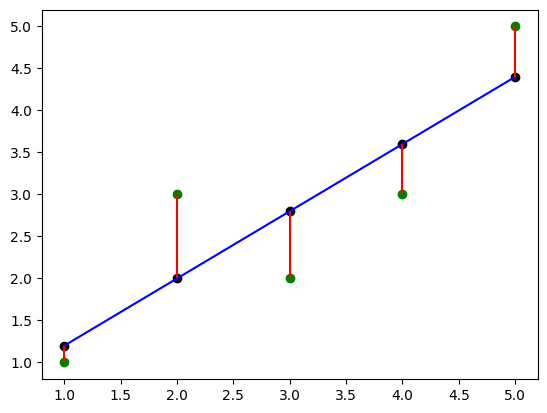

In [ ]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

Let's do some math and solve for $\beta$ using the formula

$\widehat{\beta} = \frac{s_{x,y}}{s^2_x} = r_{xy}\frac{s_y}{s_x} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

where:
* $\bar{x}$ and $\bar{y}$ are the averages of x and y
* $r_{xy}$ is the sample variance
* $s_x$ and $s_y$ are the sample standard deviation (uncorrected)
* $s_{x,y}$ and $s^2_x$ are the sample variance and sample covariance

In [ ]:
# our data
X = [1, 2, 3, 4, 5]

# find the mean of X
# x_mean = (1 + 2 + 3 + 4 + 5) / 5 or using list comprehension
x_mean = sum(i for i in x) / len(x)

#print x_mean
x_mean

3.0

In [ ]:
# print the mean of y
y = [1, 3, 2, 3, 5]
y_mean = sum(i for i in y) / len(y)
y_mean

2.8

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the numerator of $\widehat{\beta}$ we would use: $\sum(x-\bar{x})(y-\bar{y})$

Since the dataset is small we can do something like this: <br />
((1 - 3) * (1 - 2.8)) +<br />
((2 - 3) * (3 - 2.8)) +<br />
((3 - 3) * (2 - 2.8)) +<br />
((4 - 3) * (3 - 2.8)) +<br />
((5 - 3) * (5 - 2.8)) = 8

In [ ]:
# print the numerator the pythonic way
numerator = sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)])
numerator

8.0

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the denominator of $\widehat{\beta}$ we would use: $\sum(x - \bar{x})^2$

In [ ]:
# get the denominator
denominator = sum((i - x_mean)**2 for i in x)
denominator

10.0

So, $\beta$, or specifically $\widehat{\beta}$, is equal to the numerator divided by the denominator

In [ ]:
beta = numerator / denominator
beta

0.8

To find $\alpha$ we use the formula $\widehat{\alpha} = \bar{y} - \beta \bar{x}$

In [ ]:
# calculate alpha
alpha = round(y_mean - (beta * x_mean), 2)
alpha

0.4

$y = a + \beta X$

Our linear regression equation is solved: <br />
y = 0.4 + 0.8(X)

## Least Squares

The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being: the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation.

https://en.wikipedia.org/wiki/Least_squares

### The Constant

In linear regression you need that constants to have lines which are not constrained to pass through origin. Think of linear model y=b1x1+b2x2+.... If all xi are 0, y must be 0, you need an additional parameter to pass that constraint

https://datascience.stackexchange.com/questions/55598/why-we-add-a-constant-value-column-in-our-dataframe-sometimes

... our regression slopes would be less useful (without the constant).

1. Imagine the equation for a line: y=mx + b -> take the constant out and you have y=mx which means that the slope will have to account for a larger explanation than with the constant.
2. think of the constant as the “baseline” of the data and the explanatory values (the beta slopes) as the things that can affect this mean. For example, ...suppose a particular leaf will average 2 inches long (constant), but with different weather conditions, the leaf will either grow (+ length) or grow (- length). Without the constant, all the data will point to the weather conditions having a tremendous weight on the regressions - mathematically showing y = weather conditions times slope.

In a nut shell, it’s there to assist in providing an accurate view of the slope values.

https://www.quora.com/In-regression-why-do-we-include-a-constant-term (Hamilton Goff)

The constant term prevents this overall bias by forcing the residual mean to equal zero. Imagine that you can move the regression line up or down to the point where the residual mean equals zero. For example, if the regression produces residuals with a positive average, just move the line up until the mean equals zero.

https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

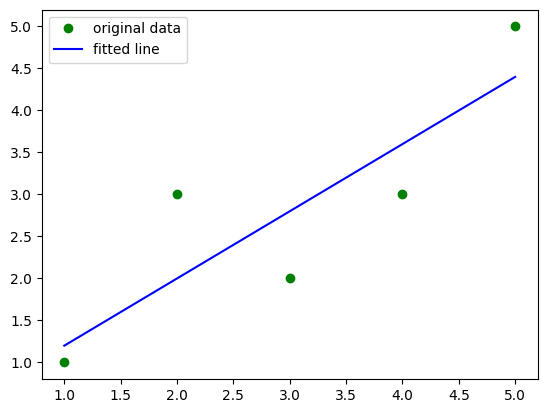

y = 0.4 + 0.8(X)


In [ ]:
# using scipy
import scipy.stats as stats

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

model = stats.linregress(x, y)

plt.plot(x, y, 'go', label='original data')
plt.plot(x, model.intercept + model.slope*x, 'b', label='fitted line')
plt.legend()
plt.show()

print(f'y = {model.intercept:.2} + {model.slope:.2}(X)')

In [ ]:
# use numpy linear algebra least squares
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

x = np.vstack([np.ones(len(x)), x]).T
a, b = np.linalg.lstsq(x, y, rcond=None)[0]
print(f'y = {a:0.1f} + {b:0.1f}X')

y = 0.4 + 0.8X


## Linear Regression with Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://en.wikipedia.org/wiki/Scikit-learn

As mentioned, Scikit-learn provides us with a linear regression model that we can use as demonstrated in the next cell.

In [ ]:
# using sklearn
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
print(f'y = {model.intercept_:.2} + {model.coef_[0]:.2}(X)')

y = 0.4 + 0.8(X)


## Linear Algebra

* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$
* $\theta = (X^T * X)^{-1} * X^T * y$
* Dot product - https://en.wikipedia.org/wiki/Dot_product
* Inverse - https://www.mathsisfun.com/algebra/matrix-inverse.html
* To multiply an m×n matrix by an n×p matrix, the ns must be the same,
and the result is an m×p matrix.

https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57


### Matrix Multiplication

In mathematics, particularly in linear algebra, matrix multiplication is a binary operation that produces a matrix from two matrices. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

https://en.wikipedia.org/wiki/Matrix_multiplication

m = rows; n = columns; (m, n) can be multiplied with another (m, n) if n from first matrix is equal to m for second matrix

In [ ]:
# Let's look at the x data
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [ ]:
# Look at the y data
y = np.array([1, 3, 2, 3, 5])
y

array([1, 3, 2, 3, 5])

To be able to multiply two matrices, the number of columns in the first matrix must equal the number of rows in the second matrix (array).

In [ ]:
# Reshape x so that the columns in x equals the number of rows in y
x = x.reshape(-1, 1)
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

print(x)
print(y)
print()

x = np.append(arr = np.ones((5, 1)).astype(int), values = x, axis = 1)
print('x matrix')
print(x)
print()

print(x.T)
print(x)
print('[1, 1, 1, 1, 1] * [1, 1, 1, 1, 1] = 5')
print('[1, 1, 1, 1, 1] * [1, 2, 3, 4, 5] = 15')
print('[1, 2, 3, 4, 5] * [1, 1, 1, 1, 1] = 15')
print('[1, 2, 3, 4, 5] * [1, 2, 3, 4, 5] = 55')
print()

print('x.T.dot(x)')
print(x.T.dot(x))
print()

print('inverse')
print(np.array([[55, -15], [-15, 5]]))
print('1/(5*55 - 15*15) * x.T.dot(x) where a and d are swapped and b and c are negative = 1/(275-225) = 1/50')
print()

print(np.linalg.inv(x.T.dot(x)))
print(x.T)
wy = np.linalg.inv(x.T.dot(x)).dot(x.T)
print(wy)
print()
print('dot(y)')
print(wy)
print(y)
print('[0.8, 0.5, 0.2, -0.1, -0.4] * [1, 3, 2, 3, 5] = .8 + 1.5 + .4 - .3 - 2 = .4')
print('[-0.2, -0.1, 0, 0.1, 0.2] * [1, 3, 2, 3, 5] = -.2 - .3 + 0 + .3 + 1 = .8')
print(wy.dot(y))
print()
print('weights = ', np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y))

[[1]
 [2]
 [3]
 [4]
 [5]]
[1 3 2 3 5]

x matrix
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]

[[1 1 1 1 1]
 [1 2 3 4 5]]
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]
[1, 1, 1, 1, 1] * [1, 1, 1, 1, 1] = 5
[1, 1, 1, 1, 1] * [1, 2, 3, 4, 5] = 15
[1, 2, 3, 4, 5] * [1, 1, 1, 1, 1] = 15
[1, 2, 3, 4, 5] * [1, 2, 3, 4, 5] = 55

x.T.dot(x)
[[ 5 15]
 [15 55]]

inverse
[[ 55 -15]
 [-15   5]]
1/(5*55 - 15*15) * x.T.dot(x) where a and d are swapped and b and c are negative = 1/(275-225) = 1/50

[[ 1.1 -0.3]
 [-0.3  0.1]]
[[1 1 1 1 1]
 [1 2 3 4 5]]
[[ 0.8  0.5  0.2 -0.1 -0.4]
 [-0.2 -0.1  0.   0.1  0.2]]

dot(y)
[[ 0.8  0.5  0.2 -0.1 -0.4]
 [-0.2 -0.1  0.   0.1  0.2]]
[1 3 2 3 5]
[0.8, 0.5, 0.2, -0.1, -0.4] * [1, 3, 2, 3, 5] = .8 + 1.5 + .4 - .3 - 2 = .4
[-0.2, -0.1, 0, 0.1, 0.2] * [1, 3, 2, 3, 5] = -.2 - .3 + 0 + .3 + 1 = .8
[0.4 0.8]

weights =  [0.4 0.8]


### Why Matrix Multiplication?

Linear algebra is often used in data science / machine learning which includes matrix multiplication. To stay within the scope of this course we will simply say that because of the large number of features that X can potentially represent, it is more efficient to use matrix multiplication.

Because matrix multiplication is such a central operation in many numerical algorithms, much work has been invested in making matrix multiplication algorithms efficient. Applications of matrix multiplication in computational problems are found in many fields including scientific computing and pattern recognition and in seemingly unrelated problems such as counting the paths through a graph.

https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

Please review the following links to learn more:

* https://en.wikipedia.org/wiki/Linear_algebra
* https://online.stat.psu.edu/stat462/node/132/
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

### The Derivative

The derivative is a fundamental tool of calculus that quantifies the sensitivity of change of a function's output with respect to its input. The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value. For this reason, the derivative is often described as the instantaneous rate of change, the ratio of the instantaneous change in the dependent variable to that of the independent variable.[1] The process of finding a derivative is called differentiation.

https://en.wikipedia.org/wiki/Derivative

A partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant (as opposed to the total derivative, in which all variables are allowed to vary). Partial derivatives are used in vector calculus and differential geometry.

https://en.wikipedia.org/wiki/Partial_derivative

* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The partial derivative of $f(x, y) = x^2 + y^3$ is $f'(x) = 2x + 0 = 2x$
* In this case we find the partial derivative with respect to x and hold y as a constant
* The derivative of a constant is 0

https://www.mathsisfun.com/calculus/derivatives-partial.html

* **Gradient Descent**

## Astronomy



## Multiple Linear Regression

https://www.investopedia.com/terms/m/mlr.asp

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Confounding Variables

* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/bs704_multivariable7.html

### Closed Form

* http://faculty.cas.usf.edu/mbrannick/regression/Part3/Reg2.html

### Assumptions of Linear Regression

* Linearity: There is a linear relationship between the independent variable and the dependent variable
* No Multicollinearity: Features should not be highly correlated
* Normality: The residuals are normally distributed
* Homoscedasticity: The residuals have an even distribution around the mean and across the spread
* Independence: There is no correlation between residuals; there is no trend, no pattern, no structure in residuals
* Time series may violate independence
* Elements that are randomly assigned to features may violate independence
* All relevant explanatory variables must be used
* Features cannot be correlated with error term

Become familiar with the plots provided in the following links:
* https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
* https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

## Mario Kart

### Data Preparation

<pre>
! git clone https://github.com/GithubName/ProjectName.git
</pre>

<pre>
import pandas as pd
from dtsc4050.version import __version__
import dtsc4050.utils as utils

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/mariokart.csv', index_col=0)

print(__version__)
print(utils.functions.hello_4050())
print(utils.functions.identify_consts(df))
print(utils.functions.identify_quasi_consts(df))
print(utils.functions.check_row_duplicates(df))
print(utils.functions.check_col_duplicates(df))
</pre>

* Initialize git
* .gitignore - https://ask.replit.com/t/how-to-move-replit-to-github-this-is-the-step/92373
* In Replit, drop Git tab down and look for Create Repository...


In [ ]:
# import pandas as pd
# import numpy as np
# import random
# import re
# from sklearn.datasets import make_regression
# import matplotlib.pyplot as plt

# def make_null(r, w):
#     rtn = random.choices([np.nan, r], weights=[w, 100-w])
#     return re.sub(r"[\[\]]",'', str(rtn))

# X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
# cols = ['Wiggler', 'Lakito', 'Tanooki Mario', 'Dry Bones', 'Lemmy Koopa', 'Toadette', 'Wario', 'Cat Peach', 'King Boo', 'Inkling', 'Baby Daisy', 'Luigi', 'Toad', 'Yoshi', 'Bowser', 'Donkey Kong', 'Princess Peach', 'Isabelle', 'Koopa Troopa', 'Mario', 'Chain Chomp', 'MII', 'Birdo', 'Baby Mario']
# random.shuffle(cols)
# variables = cols[:10]
# df = pd.DataFrame(data=X, columns=variables)
# print(df.info())
# print(cols[10])
# df[cols[10]] = round(df[cols[0]], 4)
# df[cols[11]] = df[cols[0]]
# df[cols[12]] = 0.03
# df[cols[13]] = 0.07

# df[cols[14]] = np.random.normal(0, 1, 100)
# df[cols[15]] = np.random.normal(0, 1, 100)
# df[cols[16]] = np.random.normal(0, 1, 100)

# df[cols[14]] = df[cols[14]].apply(lambda r: abs(r) if (r < -0.02) else r)
# df[cols[15]] = df[cols[15]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
# df[cols[16]] = df[cols[16]].apply(lambda r: abs(r) if (r < -0.01) else r)

# cats = [random.choice(['fast', 'medium', 'slow']) for i in range(100)]
# df[cols[17]] = cats
# cats = [random.choice(['disagree', 'kind of disagree', 'neutral', 'kind of agree', 'agree']) for i in range(100)]
# df[cols[18]] = cats
# cats = [random.choice(['yes', 'no']) for i in range(100)]
# df[cols[19]] = cats
# cats = [random.choice(['up', 'down']) for i in range(100)]
# df[cols[20]] = cats

# df[cols[21]] = random.sample(range(10000, 30000), 100)
# df[cols[22]] = random.sample(range(1000, 3000), 100)
# df[cols[21]] = df[cols[21]].apply(make_null, args=(2,))
# df[cols[22]] = df[cols[22]].apply(make_null, args=(2,))

# df['Mario Kart'] = y

# dupes = df.loc[0:7]
# df = df.append(dupes, ignore_index = True)
# df = df.sample(frac=1).reset_index(drop=True)

# # df.to_csv('mariokart.csv')

# print(df.shape)
# print(df.info())
# df.head()

In [ ]:
# # get data
# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/mariokart.csv', index_col=0)
# print(df.shape)
# print(df.info())
# df.head()

### Constants

In [ ]:
# # replace missing values and then check how many unique values are in each variable
# few_values = [
#     val for val in df.columns if len(df[val].fillna(0).unique()) == 1
# ]

# few_values

### Quasi Constants

In [ ]:
# # quasi constant values (sometimes these may be boolean features)
# for val in df.columns.sort_values():
#     if (len(df[val].unique()) < 3):
#         print(df[val].value_counts())

### Duplicates

In [ ]:
# # duplicate rows
# df[df.duplicated(keep=False)]

In [ ]:
# # drop duplicate rows
# df.drop_duplicates(inplace=True)

In [ ]:
# # check of duplicate columns
# duplicate_features = []
# for i in range(0, len(df.columns)):
#     orig = df.columns[i]

#     for dupe in df.columns[i + 1:]:
#         if df[orig].equals(df[dupe]):
#             duplicate_features.append(dupe)
#             print(f'{orig} looks the same as {dupe}')

# duplicate_features

### Drop Weak Features

In [ ]:
# # drop the variables that are duplicated or low in variance
# df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)
# df.info()

### Missing Data

In [ ]:
# # check for nulls
# df.isnull().sum()

In [ ]:
# # look at the shape of variables that are numerical
# import matplotlib.pyplot as plt

# df.hist()
# plt.tight_layout();

In [ ]:
# # impute missing values with mean and median
# df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
# df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
# df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
# df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
# df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
# df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
# df.isnull().sum()

In [ ]:
# # impute missing values with mode
# print(df['Wario'].value_counts(dropna=False))

In [ ]:
# # replace work_status with mode (not employed)
# df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)
# df.isnull().sum()

### Train Test Split

In [ ]:
# # train test split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['Mario Kart'], axis=1), df['Mario Kart'], test_size=.2, random_state=42)

# print(X_train.shape)
# print(X_test.shape)

### Outliers

In [ ]:
# # quartiles
# for feat in X_train._get_numeric_data().columns[1:]:
#     q1 = X_train[feat].quantile(0.25)
#     q3 = X_train[feat].quantile(0.75)
#     iqr = q3 - q1
#     lower_fence = (q1 - 1.5 * iqr)
#     upper_fence = (q3 + 1.5 * iqr)
#     lower_count = X_train[feat][X_train[feat] < lower_fence].count()
#     upper_count = X_train[feat][X_train[feat] > upper_fence].count()
#     print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

In [ ]:
# # Assignment boxplot
# X_train.boxplot(column=['Koopa Troopa']);

### Scaling

In [ ]:
# check df.min(), df.max()

In [ ]:
# # standardize feature (whatever you do for X_train, do for X_test)
# from sklearn.preprocessing import StandardScaler

# feat = str(X_train._get_numeric_data().idxmax(1)[0])
# scaler = StandardScaler()
# X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
# X_test[feat] = scaler.fit_transform(X_test[[feat]].values)

In [ ]:
# # normalize feature (whatever you do for X_train, do for X_test)
# from sklearn.preprocessing import MinMaxScaler

# feat = str(X_train._get_numeric_data().idxmax(1)[0])
# scaler = MinMaxScaler()
# X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
# X_test[feat] = scaler.fit_transform(X_test[[feat]].values)

## Exploratory Data Analysis

### Interesting Stats?

### Interesting Visuals?

### What's the Story?

* https://en.wikipedia.org/wiki/Mario_Kart

In [ ]:
# # describe
# X_train.describe()

## Correlation

* Correlation heat map
* Correlation with code
* Variance Threshold
* Variance Inflation Factor
* Removing Multicollinearity and Re Imaging
* Re-enginnering Multicollinearity Features

**SEE CORRELATION**

### Correlation and the Gradient

* If the standard deviation for x and y are the same then the gradient is Pearson's correlation
* **PEARSON's R and the GRADIENT**

### Multicollinearity

In [ ]:
# # correlation heat map
# import numpy as np
# import seaborn as sns
# from scipy import stats

# # correlation matrix
# sns.set(style="white")

# # compute the correlation matrix
# corr = X_train.corr()

# # generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True

# # set up the matplotlib figure
# # f, ax = plt.subplots()
# f = plt.figure(figsize=(8, 8))

# # generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# plt.tight_layout()

In [ ]:
# # delete one of the features out of the pair(s) that show multicollinearity
# # whatever you do for X_train, do for X_test
# X_train.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)
# X_test.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)

In [ ]:
# # sns pairplot
# import seaborn as sns

# eda_data = X_train.copy()
# eda_data['Mario Kart'] = y_train

# sns.pairplot(data=eda_data, corner=True);

In [ ]:
# # scatter plots showing correlation
# import pandas as pd
# import seaborn as sns

# sns.pairplot(data=eda_data, x_vars=['Toad', 'Isabelle', 'Koopa Troopa', 'Mario'], y_vars='Mario Kart',
#              kind='reg',
#              height=5,
#              aspect=0.8,
#              plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

In [ ]:
# # correlation with target
# X_train.corrwith(y_train).plot.bar(
#         title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

## Feature Engineering

### Bi-Label Mapping

In [ ]:
# # bi-label mapping
# # whatever you do for X_train, do for X_test
# X_train['Inkling'] = X_train['Inkling'].map({'up':1,'down':0})
# X_test['Inkling'] = X_test['Inkling'].map({'up':1,'down':0})

# X_train['King Boo'] = X_train['King Boo'].map({'yes':1,'no':0})
# X_test['King Boo'] = X_test['King Boo'].map({'yes':1,'no':0})

### One-Hot Encoding

#### Dummy Trap

The dummy variable trap is a scenario in which the independent variables become multicollinear after addition of dummy variables. The value of one variable can be predicted from the values of other variable(s).

In [ ]:
# # use sklearn one hot encoder
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

# cat_features = ['Wario', 'Cat Peach']
# ohe_train = ohe.fit_transform(X_train[cat_features])
# ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
# ohe_train.index = X_train.index
# X_train = X_train.join(ohe_train)
# X_train.drop(cat_features, axis=1, inplace=True)

# ohe_test = ohe.transform(X_test[cat_features])
# ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
# ohe_test.index = X_test.index
# X_test = X_test.join(ohe_test)
# X_test.drop(cat_features, axis=1, inplace=True)

# print(X_train.shape)
# print(X_test.shape)
# print(X_train.info())

### One-Hot Encoding Alternatives

* Frequency Encoding
* Mean Encoding

In [ ]:
# # identify features with more than 5 features and use frequency encoding
# freq_feats = []

# for feat in freq_feats:
#     freq = X_train.groupby(feat).size()/len(X_train)
#     X_train.loc[:, feat] = X_train[feat].map(freq)
#     freq = X_test.groupby(feat).size()/len(X_test)
#     X_test.loc[:, feat] = X_test[feat].map(freq)

## Metrics

###  MSE

$\frac{1}{n}\sum(y-\hat{y})^2$

vs.

### Variance (sample)

$\frac{1}{n-1}\sum(x-\bar{x})^2$

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate... The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent.

https://en.wikipedia.org/wiki/Mean_squared_error

In datasets with a small spread all values are very close to the mean, resulting in a small variance and standard deviation. Where a dataset is more dispersed, values are spread further away from the mean, leading to a larger variance and standard deviation.

https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread

### R Squared

* $SS_{res} = \sum{(y - \hat{y})^2}$
* $SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model
* **R-Squared, R, r, TSS ESS and RSS**

### Adjusted R Squared

Features are considered

* $Adj R^2 = 1 - (1 - R^2)\frac{n-1}{n-p-1}$ where p = number of features and n = size of dataset
* $R^2$ will never decrease adding more features
* Adj R squared accounts for relevant features
* Adjusted $R^2$ will be influenced by an increase of $p$

### MSE or R Squared

It is recommended to use R-Squared or rather adjusted R-Squared for evaluating the model performance of the regression models. This is primarily because R-Squared captures the fraction of variance of actual values captured by the regression model and tends to give a better picture of the quality of the regression model. Also, MSE values differ based on whether the values of the response variable are scaled or not. A better measure instead of MSE is the root mean squared error (RMSE) which takes care of the fact related to whether the values of the response variable are scaled or not.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

### Cost or Loss Function

In mathematical optimization and decision theory, a loss function or cost function (sometimes also called an error function) is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its opposite (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.

We often use MSE as our cost function in linear regression $mse = \frac{\sum(y-\hat{y})^2}{n}$.

https://en.wikipedia.org/wiki/Loss_function

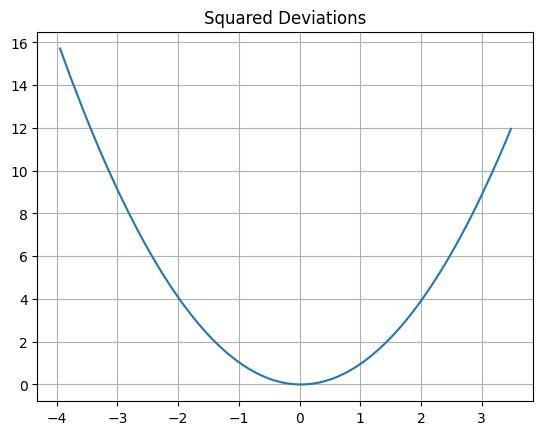

The mean of our data is 0.02.


In [ ]:
# visualizing deviations from the mean squared
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

data = norm.rvs(size=10000)
x = sorted(np.array(data))
y = [(i - np.mean(x))**2 for i in x]
plt.title('Squared Deviations')
plt.plot(x, y)
plt.grid()
plt.show()

print(f'The mean of our data is {round(np.mean(data), 2)}.')

## Statsmodels and Ordinary Least Squares

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

https://en.wikipedia.org/wiki/Ordinary_least_squares

## Adding a Constant (or Intercept)

As a rule, the constant term is always included in the set of regressors X ...

https://en.wikipedia.org/wiki/Ordinary_least_squares

The intercept (often labeled the constant) is the expected mean value of y when all X=0.

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

Immediately above, we saw a key reason why you should include the constant in your regression model. It guarantees that your residuals have a mean of zero. Additionally, if you don’t include the constant, the regression line is forced to go through the origin. This means that all of the predictors and the response variable must equal zero at that point. If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

In [ ]:
# # delete a bunch for
# # whatever you do for X_train, do for X_test
# drop_demo = ['Cat Peach_neutral',
#               'Cat Peach_kind of disagree',
#               'Cat Peach_kind of agree',
#               'Cat Peach_disagree',
#               'Wario_\'slow\'',
#               'Wario_\'medium\'',
#               'Chain Chomp',
#               'Inkling'
#              ]

# X_train.drop(drop_demo, axis=1, inplace=True)
# X_test.drop(drop_demo, axis=1, inplace=True)

In [ ]:
# import statsmodels.api as sm

# # what ever we do for X_train, do for X_test
# X_train.insert(0, 'const', 1)
# X_test.insert(0, 'const', 1)
# model = sm.OLS(y_train, X_train).fit()
# model.summary()

### OLS Regression Results Explanation

* Endog(enous): Similar to the dependent variable
* Exog(enous): Similar to the independent variable
* https://www.statisticshowto.com/endogenous-variable/
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### Model Info
* Dep. Varialble: the response variable, dependent, outcome, etc.
* Model: what model are we using (ordinary least squares) for the training
* Method: how the parameters (coefficients) were calculated
* No. Observations: the number of observations, rows... (n)
* DF Residuals: degrees of freedom of the residuals
* DF Model: number of parameters in the model excluding the constant if present
* Covariance Type: deals with violations of assumptions

### Goodness of Fit
* R-Squared: coefficient of determination, how well the regression fits the data
* Adj R-Squared: R-squared adjustment based on number of parameters and df residuals
* F statistic: a measure of how significant the fit is
* Prop F statistic: the probability that you would get the F stat given the null hypothesis
* Log-Liklihood: can be used to compare the fit of different coefficients, the higher valur is better
* AIC: Akaike Information Criterion is used to compare models, a lower score is better (doesn't address features, just the overall model)
* BIC: Bayesian Information Criterion is similar to AIC but uses a higher penalty

### Coefficients
* coef: the estimated value of the coefficient
* std error: the basic standard error of the estimate of the coefficient
* t: the t-statistic value, how significant the coefficient is
* P>|t|: the p-value, indicates a statistically significant relationship to the dependent variable if less than the confidence level, usually 0.05
* 95% confidence interval: the lower and upper values

### Statistical Tests
* Skewness: A measure of the symmetry of the data about the mean
* Kurtosis: A measure of the shape of the data
* Omnibus: D'Angostino's test provides a combined test for the presence of skewness and kurtosis
* Prob(Omnibus): probability of Omnibus
* Jarque-Bera: Another test for skewness and kurtosis
* Prob(Jarque-Bera): probability of Jarque-Bera
* Durbin-Watson: A test for the presence of autocorrelation, if the errors aren't independent
* Cond No: A test for multicollinearity

## Stepwise Procedures

* Backward Elimination: involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.
* Forward Selection: involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
* Mixed Selection: a combination of the above, testing at each step for variables to be included or excluded.

### Backward Elimination Process

* Note Adj R-squared
* AIC
* BIC
* Note P>|t| greater than 0.05

Let's get rid of the feature with the highest P>|t| and run it again to see if anything improves

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [ ]:
# # review model summary
# model.summary()

### Term Review

### Const

The constant, y intercept, takes care of the bias in the data (a constant difference which is there for all observations). Recall bias plot in Bessel's Correction, it forces the residuals to have that crucial zero mean.

https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

### Coefficient

The standardized simple linear regression coefficient is equal to the correlation coefficient (r). In the OLS summary, the coefficient shows the amount y changes for a unit increase in x. In this way it represents the degree to which the line slopes upwards or downwards.

### Standard Error

The standard error of a coefficient indicates the accuracy of the estimated ordinary least squares (OLS) coefficient with respect to its population parameter. Each standard error is the square root of the variance of the corresponding coefficient.

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### t - Statistic

Dividing the coefficient by its standard error calculates a t-value. If the p-value associated with this t-statistic is less than your alpha level, you conclude that the coefficient is significantly different from zero.

https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistical-modeling/regression/supporting-topics/regression-models/what-is-the-standard-error-of-the-coefficient/

Associated with a t-test such as in a test of means, the comparison of the means of two samples

### P > |t|

For each test, the t-value is a way to quantify the difference between the population means and the p-value is the probability of obtaining a t-value with an absolute value at least as large as the one we actually observed in the sample data if the null hypothesis is actually true.

https://www.statology.org/t-value-vs-p-value/

### .025 ~ .975

Measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

In [ ]:
# model = sm.OLS(y_train, X_train.drop(['King Boo'], axis=1)).fit()
# model.summary()

In [ ]:
# model = sm.OLS(y_train, X_train.drop(['King Boo', 'Princess Peach'], axis=1)).fit()
# model.summary()

### Forward Selection Process

Start with the lowest alphas

* Note Adj r-squared
* AIC
* BIC

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [ ]:
# # forward selection
# model = sm.OLS(y_train, X_train[['Toad']]).fit()
# model.summary()

In [ ]:
# # forward selection
# model = sm.OLS(y_train, X_train[['Toad', 'Isabelle']]).fit()
# model.summary()

AIC and BIC both are trending up

## Regularization

* Penalizes complex models to avoid overfitting
* More on overfitting and underfitting next week

https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

In mathematics, statistics, finance, computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization can be applied to objective functions in ill-posed optimization problems. The regularization term, or penalty, imposes a cost on the optimization function to make the optimal solution unique.

https://en.wikipedia.org/wiki/Regularization_(mathematics)



### Lasso / l1 Regularization

* $\alpha = \sum|w_i|$
* Forces weak features to have zero coefficients
* Performs feature selection
* Models can be unstable (coefficients fluctuate significantly on data changes with correlated features)

In [ ]:
# # lasso example
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X_train)
# y = y_train
# names = X_train.columns

# lasso = Lasso(alpha=8)
# lasso.fit(X, y)

# d = {'Feature': names, 'Coeff': lasso.coef_}
# lasso_df = pd.DataFrame(d)
# print(lasso_df[1:])

### Selected Features


In [ ]:
# # what ever you do for X_train do for X_test
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

In [ ]:
# X_train.insert(0, 'const', 1)
# X_test.insert(0, 'const', 1)
# model = sm.OLS(y_train, X_train).fit()
# model.summary()

## Sklearn Linear Regression Model

In [ ]:
# # create and train the model
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train.drop('const', axis=1), y_train)

# # test set prediction results
# yhat = model.predict(X_test.drop('const', axis=1))
# print('r squared: ', model.score(X_train.drop('const', axis=1), y_train))

In [ ]:
# # view the coefficients and intercept
# print(model.intercept_)
# print(list(zip(X_train.drop('const', axis=1), model.coef_)))

### Interpreting the Coefficient

* **COEFFICIENT INTERPRETATION**

## Confidence Intervals

* In a normal distribution, the confidence interval represents the spread of values where the null hypothesis is true, usually 95% or two standard deviations

In [ ]:
# # scatter plots showing correlation
# import pandas as pd
# import seaborn as sns

# sns.pairplot(data=eda_data, x_vars=X_train.drop('const', axis=1).columns, y_vars='Mario Kart',
#              kind='reg',
#              height=5,
#              aspect=0.8,
#              plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

The shaded red areas represent our 95% confidence intervals.

* Confidence intervals tend to be wider the more variability in a distribution
* Confidence intervals tend to be narrower the larger the sample size is
* Confidence intervals tend to be narrower when our accuracy is higher

Looking at the scatterplots, which of the features have linear characteristics? Which of the lines of best fit are closer to being parallel to the x axis?

### Measures of Center, Spread, and Shape

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.regplot(data=eda_data, x='Isabelle', y='Mario Kart'); # recommended to not use ci with large data
# plt.axvline(x=eda_data['Isabelle'].mean(), color='green')
# plt.axhline(y=eda_data['Mario Kart'].mean(), color='green');

In [ ]:
# import matplotlib.pyplot as plt

# X_train.drop('const', axis=1).hist()
# plt.tight_layout();

## Prediction Intervals

You should use a prediction interval instead of a confidence intervals for predictions. Using the confidence interval will likely introduce error, meaning that values will fall outside that interval more often than you predict.

Stephanie Glen. "Prediction Interval: Simple Definition, Examples" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/prediction-interval/

In [ ]:
# # build OLS model and print summary
# import statsmodels.api as sm

# # eda_data.insert(0, 'const', 1)
# intervals_model = sm.OLS(eda_data['Mario Kart'], eda_data['Isabelle'])
# results = intervals_model.fit()
# print(results.summary())

In [ ]:
# # make predictions
# predictions = results.get_prediction(eda_data['Isabelle']).summary_frame(alpha=0.05)
# predictions[:1]

In [ ]:
# sns.regplot(x='Isabelle', y='Mario Kart',
#             data=eda_data,
#             scatter_kws={'color': 'blue', 'alpha': 0.5},
#             label='observed',
#             line_kws={'label': 'regression'},
#             color='red')
# plt.plot(eda_data['Isabelle'], predictions['obs_ci_upper'], label='prediction', color='green')
# plt.plot(eda_data['Isabelle'], predictions['obs_ci_lower'], color='green')
# plt.legend();

## Imputation Using Prediction

* **IMPUTATION USING PREDICTION**